In [63]:
import pandas as pd
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def readGoogleFile(file_type):
    switcher = {
        'per': '1A5vmjBythJo-StJ_TPry3s6KDT_4gHjT',
        'ret': '1JPeBpJfiyyImBRrYa4sWnpFDTZzHcAjS'
    }
    fileID = switcher.get(file_type, '')
    # Authenticate and create the PyDrive client.
    # This only needs to be done once per notebook.
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    # Download a file based on its file ID.
    #
    # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
    downloaded = drive.CreateFile({'id': fileID})
    file_name = file_type + '.csv'
    downloaded.GetContentFile(file_name)
    df = pd.read_csv(file_name)
    return df

def sort_csv(corpus,model,fb_terms):
  df = readGoogleFile ('per')
  criteria = (df['model'] == model) & (df['corpus'] == corpus) & (df['fbTerms'] == int(fb_terms))
  df = df[criteria].iloc[:,[0,4,6,7,8,9]].sort_values('Trec-MAP',ascending=False)
  print ('Corpus : ' , corpus)
  print ('Line Count : ' , len(df))
  print('The Best 3 trec_eval values : ')
  print(df.head(3) , '\n')

# *** Start Colab Form ***
# @title Best Performance
#@markdown Get The Best 3 Trec_Eval Values based on input criteria
Corpus = "All"  # @param ["Aquaint", "Core17", "WAPO" , "All"]
Model = "PL2"  # @param ["BM25", "LMD", "PL2"]
FbTerms = "10"  # @param ["10", "20", "30"]

# *** End Colab Form ***

if __name__ == '__main__':
  if Corpus == 'All':
    for Corpus in 'Aquaint,Core17,WAPO'.split(','):
      sort_csv(Corpus,Model,FbTerms)
  else:
    sort_csv(Corpus,Model,FbTerms)


Corpus :  Aquaint
Line Count :  90
The Best 3 trec_eval values : 
       corpus model  fbTerms  fbDocs  RetrievalCoefficient  Trec-MAP
1102  Aquaint   PL2       10       5                  20.0    0.2642
1101  Aquaint   PL2       10       5                  15.0    0.2624
4021  Aquaint   PL2       10      20                   5.1    0.2614 

Corpus :  Core17
Line Count :  90
The Best 3 trec_eval values : 
      corpus model  fbTerms  fbDocs  RetrievalCoefficient  Trec-MAP
2490  Core17   PL2       10      40                   1.0    0.2897
2474  Core17   PL2       10      30                   1.0    0.2891
2482  Core17   PL2       10      35                   1.0    0.2889 

Corpus :  WAPO
Line Count :  90
The Best 3 trec_eval values : 
     corpus model  fbTerms  fbDocs  RetrievalCoefficient  Trec-MAP
4218   WAPO   PL2       10       5                   5.1    0.3182
3771   WAPO   PL2       10       5                   5.0    0.3179
3772   WAPO   PL2       10       5                  1

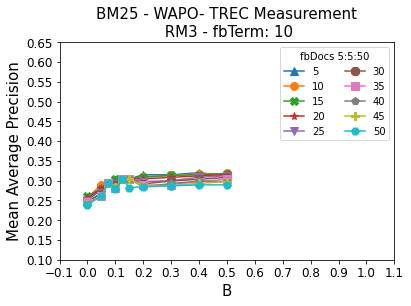

In [50]:
# -*- coding: utf-8 -*-
"""csvPlotterBook.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19ZUfPJCzY-YXJaIcS8tEkJQt4wm-_l2d
"""

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as nm
import pandas as pd
from pathlib import Path as pth
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Global Variables
# Column Indexes
# Key Group Index
# All Axis Indexes
[
    modelCoefficientIndex,  # 1

    # Retrievability Index 2
    cumulativeGIndex,
    gravityGIndex,
    rSumIndex,

    # RM3 Indexes 5
    fbTermsIndex,
    # Performance Group Index 6
    trecMapIndex,
    trecBprefIndex,
    trecP10Index,
    cwlMapIndex,
    cwlP10Index,
    rbp6Index,
    rbp8Index] = [*range(1, 13, 1)]

# All Input Data
[
    GCorpus,  # Current Corpus ('A','C','W') = ('AQUAINT' , 'Core17' , 'WAPO')
    GModel,  # Current Model ('B','C','MU') = ('BM25' , 'PL2' , 'LMD')
    GIndexType,  # The IndexType ('U','B','C','F')
    GFBTerms,
    GFBDocs,
    GCoefficient,
    GPlotCount,
    GXAxis,
    GYAxis,
    GPlotType,
    GPredefinedTicks,
    GDisplayData
] = range(12)

# Other Required Global Parameters
GCsvInPath = ''  # The Path Of input CSV File
GCsvOutPath = ''  # The Path Of output CSV File
GXLimits = []
GYLimits = []
GAllValue = -999
GReadSource = ""
GB = GAllValue
[GIndexStructureType,
 GSpecificTermType,
 GSpecificCoefficientType] = [*range(3)]


# *****  End Of Global Variables

def readWindowsFile(inFileName):
    global GCsvInPath, GCorpus
    # Windows Read
    if inFileName == 'Ticks':
        corpus = getCorpus(GCorpus)[:2].upper()
        path = str(pth(__file__).parent)
        fileName = path + ('\\Ticks\\%sTicks.csv' % (corpus))
    else:
        group = getGroup(inFileName)
        if group == 'key':
            group = 'per'
        fileName = '%s\\%s.csv' % (GCsvInPath, group)
    return pd.read_csv(fileName)


def readGoogleFile(inFileName):
    global GCorpus
    if inFileName == 'Ticks':
        corpus = getCorpus(GCorpus)[:2].upper()
        fileName = corpus + inFileName + '.csv'
    else:
        group = getGroup(inFileName)
        if group == 'key':
            group = 'per'
        fileName = group + '.csv'

    switcher = {
        'per.csv': '1A5vmjBythJo-StJ_TPry3s6KDT_4gHjT',
        'ret.csv': '1JPeBpJfiyyImBRrYa4sWnpFDTZzHcAjS',
        'AQTicks.csv': '12jpPUT2PPidZFM3PsTg7cnOVRWnX_rBu',
        'COTicks.csv': '11MYQ7VxJCMrHEKewpJERWmPIzgnq9Lsw',
        'WATicks.csv': '1h3-azAXdMxd53NgOqTtguz-a2Po06sIr'
    }
    fileID = switcher.get(fileName, '')
    # Authenticate and create the PyDrive client.
    # This only needs to be done once per notebook.
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    # Download a file based on its file ID.
    #
    # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
    downloaded = drive.CreateFile({'id': fileID})
    downloaded.GetContentFile(fileName)
    df = pd.read_csv(fileName)
    return df


def readFile(inFileName):
    global GReadSource
    if GReadSource.upper() == 'W':
        df = readWindowsFile(inFileName)
    else:
        # print('None')
        df = readGoogleFile(inFileName)
    return df


def getGValue(val):
    if val == GAllValue or val == '':
        result = GAllValue
    else:
        result = val.upper()
    return result


def getHeader(purpose):
    # header Names
    # corpus-indexType-qryFilter-qryCount-model-maxResults-
    # fbTerms-fbDocs-RetrievalCoefficient-Trec-MAP
    # Trec-Bref-Trec-P10-CWL-MAP-CWL-P10-CWL-RBP0.6-CWL-RBP0.8
    hdCorpus = 'corpus'
    hdIndexType = 'indexType'
    hdModel = 'model'
    hdFbTerms = 'fbTerms'
    hdFbDocs = 'fbDocs'
    hdCoefficient = 'RetrievalCoefficient'
    hdB = 'RetrievabilityB'
    hdG = 'G'
    hdBaseKeys = [hdCorpus, hdModel, hdIndexType]
    switcher = {
        'termsSort': hdBaseKeys + [hdCoefficient, hdFbDocs, hdFbTerms],
        'keyValues': hdBaseKeys + [hdFbTerms, hdFbDocs, hdCoefficient],
        0: hdCorpus,
        'corpus': hdCorpus,
        'model': hdModel,
        'indexType': hdIndexType,
        'fbDocs': hdFbDocs,
        'fbTerms': hdFbTerms,
        'coefficient': hdCoefficient,
        'b': hdB,
        'G': hdG
    }
    result = switcher.get(purpose)
    return result


def getPlotTypeGroup():
    global GPlotType, GIndexStructureType, GSpecificCoefficientType, GSpecificTermType
    if GPlotType == 'is':
        result = GIndexStructureType
    elif GPlotType.startswith('term'):
        result = GSpecificTermType
    else:
        result = GSpecificCoefficientType
    return result

def getGroup(index):
    result = ""
    if index == modelCoefficientIndex:
        result = 'key'
    elif index < fbTermsIndex:
        result = 'ret'
    # elif index == fbTermsIndex:
    #     result = 'rm3'
    else:
        result = 'per'
    return result


def getCsvIndex(axisIndex):
    global GCoefficientIndex
    # header Names - Per.CSV
    # corpus-indexType-qryFilter-qryCount-model-maxResults-fbTerms
    # -fbDocs-RetrievalCoefficient-Trec-MAP
    # Trec-Bref-Trec-P10-CWL-MAP-CWL-P10-CWL-RBP0.6-CWL-RBP0.8
    group = getGroup(axisIndex)
    GIndex = 10
    # Key in Per.csv
    if group == 'key':
        result = 8
    elif axisIndex == fbTermsIndex:
        result = 6
    elif group == 'per':
        result = axisIndex + 3
    elif axisIndex == rSumIndex:
        result = GIndex + 2
    else:
        # G Index
        result = GIndex

    return result

def getCriteria():
    global GCorpus, GModel, GIndexType, GFBTerms, GFBDocs, GCoefficient, GB

    result = {
        getHeader('corpus'): getCorpus(GCorpus),
        getHeader('model'): getModel(GModel),
        getHeader('indexType'): getIndexType(GIndexType),
    }
    if GFBTerms != GAllValue:
        result[getHeader('fbTerms')] = GFBTerms
    if GFBDocs != GAllValue:
        result[getHeader('fbDocs')] = GFBDocs
    if GCoefficient != GAllValue:
        result[getHeader('coefficient')] = GCoefficient
    if GB != GAllValue:
        result[getHeader('b')] = GB
    return result


def filterAndSortRows(df):
    global GPlotCount, GPlotType, GSpecificCoefficientType
    # Get X and Y Columns based on input criteria
    # header Names - Per.CSV
    # corpus-indexType-qryFilter-qryCount-model-maxResults-
    # fbTerms-fbDocs-RetrievalCoefficient-Trec-MAP
    # Trec-Bref-Trec-P10-CWL-MAP-CWL-P10-CWL-RBP0.6-CWL-RBP0.8

    # Gather Criteria in a Dictionary

    criteria = getCriteria()
    # Filter Rows
    plotTypeGroup = getPlotTypeGroup()

    for key, val in criteria.items():
        if len(df) > 0:
            if (key == getHeader('fbTerms') and plotTypeGroup == GSpecificCoefficientType):
                df = df.loc[df[key] > 0]
            else:
                df = df.loc[df[key] == val]
        else:
            break
    if len(df) > 0:
        # sort Rows
        if plotTypeGroup == GSpecificCoefficientType:
            # Specific Coefficient Based of Terms
            df = df.sort_values(getHeader('termsSort'))
        else:
            df = df.sort_values(getHeader('keyValues'))
        # Trim Rows
        if GPlotCount != GAllValue:
            plotCount = min(GPlotCount, len(df))
            df = df.head(plotCount)
    return df

def getGAllValue(val):
    if val == GAllValue:
        result = val
    else:
        result = val.upper()
    return result

def setRetBValue(axis):
    global GB
    if axis == cumulativeGIndex:
        GB = 0
    elif axis == gravityGIndex:
        GB = 0.5
    else:
        GB = GAllValue

def getSingleColumn(axis):
    # Get One Column From a Single File
    # Return DataFram [KeyColumns + Target Column]

    # Read input
    df = readFile(axis)
    # Filter Rows
    df = filterAndSortRows(df)
    # Filter Columns ( Key Columns + index Column )
    csvIndex = getCsvIndex(axis)
    header = getHeader('keyValues') + [df.columns[csvIndex]]
    df = df[header]
    return df

def getTwoColumns():
    global GYAxis
    # Get Two Columns From a Single File
    # Retuen List of X and Y Values
    # Read input

    df = readFile(GYAxis)
    # Filter Rows
    df = filterAndSortRows(df)
    return df

def getValues():
    global GXAxis, GYAxis, GDisplayData
    xValues = []
    yValues = []
    lastKeyIndex = 8
    xGroup = getGroup(GXAxis)
    yGroup = getGroup(GYAxis)

    if xGroup == yGroup or xGroup == 'key':
        # Same File
        setRetBValue(GYAxis)
        df = getTwoColumns()
        # Filter Columns
        xCsvIndex = getCsvIndex(GXAxis)
        yCsvIndex = getCsvIndex(GYAxis)

        dfRange = [*range(1, lastKeyIndex + 1, 1),xCsvIndex,yCsvIndex]
        disDf = df.iloc[:, dfRange]
        if GDisplayData:
            print(disDf.to_string())
        xValues = disDf.iloc[:, lastKeyIndex].tolist()
        yValues = disDf.iloc[:, lastKeyIndex + 1].tolist()
        # if GDisplayData:
        #     print(df.to_string())
        # xValues = df.iloc[:, xCsvIndex].tolist()
        # yValues = df.iloc[:, yCsvIndex].tolist()
        return [xValues, yValues]
    else:
        setRetBValue(GXAxis)
        dfX = getSingleColumn(GXAxis)
        setRetBValue(GYAxis)
        dfY = getSingleColumn(GYAxis)
        dfXY = pd.merge(dfX, dfY, how='inner', on=getHeader('keyValues'), suffixes=['_df', '_df2'])
        if len(dfXY) > 0:
            if GDisplayData:
                print(dfXY.to_string())
            [xValues, yValues] = [dfXY.iloc[:, 6].tolist(), dfXY.iloc[:, 7].tolist()]

    if (GXAxis == rSumIndex and len(xValues) > 0):
        xValues = [str(round(x / 1000000, 2)) + ' M' for x in xValues]
    return [xValues, yValues]

def getCorpus(c):
    switcher = {
        'A': "Aquaint",
        'C': 'Core17',
        'W': 'WAPO'
    }
    return switcher.get(c)

def getIndexType(i):
    switcher = {
        'U': "UnigramIndex",
        'B': "BigramIndex",
        'C': "CombinedIndex",
        'F': "FieldedIndex"
    }
    return switcher.get(i)

def getModel(model):
    switcher = {
        "B": "BM25",
        "MU": "LMD",
        'C': "PL2",
    }
    return switcher.get(model)

def getModelCoefficient(model):
    switcher = {
        "BM25": "B",
        "LMD": "MU",
        "PL2": 'C'
    }
    return switcher.get(model)

def getPlotType(plotType):
    switcher = {
        "Index Structure": 'is',
        'FBDocs Over FBTerms 10': 'term10',
        'FBDocs Over FBTerms 20': 'term20',
        'FBDocs Over FBTerms 30': 'term30',
        'FBDocs Over FBTerms BM25 - 0.75': 'c-b-0.75',
        'FBDocs Over FBTerms LMD - 310': 'c-mu-310',
        'FBDocs Over FBTerms PL2 - 5.1': 'c-c-5.1'
    }
    return switcher.get(plotType)

def getAxis(axisLabel):
    switcher = {
        'modelCoefficient': modelCoefficientIndex,
        'TrecMAP': trecMapIndex,
        'CWLMAP': cwlMapIndex,
        'G - Cumulative': cumulativeGIndex,
        'G - Gravity': gravityGIndex,
        'BPref': trecBprefIndex,
        'P10': trecP10Index,
        'RBP0.6': rbp6Index,
        'RBP0.8': rbp8Index,
        'RSum': rSumIndex
    }
    return switcher.get(axisLabel)

def getMarker(i):
    switcher = {
        # Multiple  Indexes
        'U': "^",  # Upper Triangle
        'B': "o",  # Circle
        'C': "X",  # X Filled
        'F': "*",  # Star
        # RM3
        '5': "^",  # Upper Triangle
        '10': "o",  # Circle
        '15': "X",  # X Filled
        '20': "*",  # Star
        '25': "v",  # Upper Triangle
        '30': "8",  # Circle
        '35': "s",  # X Filled
        '40': "p",  # Star
        '45': "P",  # Upper Triangle
        '50': "H"
    }
    return switcher.get(i, "nothing")

def setLimits(xValues, yValues):
    global GXLimits, GYLimits, GXAxis
    if GXAxis != rSumIndex:
        GXLimits = getLimits(GXLimits, xValues)
        GYLimits = getLimits(GYLimits, yValues)

def plotIndexList(xValues, yValues):
    global GIndexType
    plt.plot(xValues, yValues, label=getIndexType(GIndexType),
             marker=getMarker(GIndexType),
             markerSize=8
             )
    setLimits(xValues, yValues)

def plotRM3List(xValues, yValues):
    global GFBDocs, GXLimits, GYLimits
    plt.plot(xValues, yValues, label=GFBDocs,
             marker=getMarker(str(GFBDocs)),
             markerSize=8
             )
    setLimits(xValues, yValues)

def getAllValues(val, valType):
    if val == GAllValue:
        switcher = {
            'corpus': 'A C W'.split(' '),
            'model': 'B C MU'.split(' '),
            'index': 'U B C F'.split(' '),
            'fbdocs': [*range(5, 55, 5)],
            'fbterms': [*range(5, 55, 5)]
        }
        result = switcher.get(valType)
    else:
        result = [val]
    return result

def getChartType(index):
    global GModel
    switcher = {
        cumulativeGIndex: "G - Cumulative - B = 0",
        gravityGIndex: "G - Gravity - B = 0.5",
        trecMapIndex: "Mean Average Precision",
        trecP10Index: "P10",
        cwlMapIndex: "Mean Average Precision",
        cwlP10Index: "P10",
        trecBprefIndex: "Binary Preference",
        rSumIndex: "Total Retrievability Mass",
        modelCoefficientIndex: GModel,
        rbp6Index: 'Rank Based Precision 0.6',
        rbp8Index: 'Rank Based Precision 0.8'
    }
    return switcher.get(index)

def getPerformanceType(i):
    if (i >= trecMapIndex and i <= trecP10Index):
        result = 'Trec'
    elif i >= cwlMapIndex:
        result = 'CWL'
    else:
        result = ''
    return result

def getFont():
    # Get Libertine Font From its File
    # Specify The Location of the File in Path Variable
    # Matplotlib cache should be deleted
    # ( The Contents of .matplotlib Folder should be deleted )
    path = r'C:\Users\kkb19103\Desktop\My Files 07-08-2019\My Work\libertine\opentype\LinLibertine_R.otf'
    prop = fm.FontProperties(fname=path)
    return prop.get_name()

def getTicksInfo(index):
    global GModel, GPlotType, GPlotCount, GIndexStructureType
    fileName = 'Ticks'
    df = readFile(fileName)
    header = ''
    allModels = getAllValues(GAllValue, 'model')
    plotTypeGroup = getPlotTypeGroup()

    if GModel == 'MU' and GPlotCount != GAllValue and \
       GPlotCount > 0 and index == modelCoefficientIndex:
        header = 'muless'
    elif GModel in allModels and index == modelCoefficientIndex:
        header = GModel.lower()
    elif index == fbTermsIndex:
        header = 'fbterms'
    elif plotTypeGroup != GIndexStructureType:
        header = 'rm3Map'
    else:
        switcher = {
            cwlMapIndex: 'cwlMap',
            cwlP10Index: 'cwlP10',
            rbp6Index: 'r6',
            rbp8Index: 'r8',
            trecBprefIndex: 'bpref',
            cumulativeGIndex: 'g',
            gravityGIndex: 'g'
        }
        header = switcher.get(index, '')
    return [header, df]

def getPredefinedTicks(index):
    [header, df] = getTicksInfo(index)
    if header != '':
        result = list(df.loc[:, header])
    else:
        result = ''
    return result

def getVariableLimits(index, limits):
    [header, df] = getTicksInfo(index)
    if (header != '' and len(df) > 0):
        step = df[header].loc[2]
    else:
        step = (limits[1] - limits[0]) / 5

    limits[0] -= (step * 2)
    limits[1] += (step * 2)
    result = limits + [step]
    return result

def addPredefinedTicks():
    global GXAxis, GYAxis, GXLimits, GYLimits
    plt.tick_params(labelsize=12)
    x = ''
    if GXAxis != rSumIndex:
        x = getPredefinedTicks(GXAxis)
        # x = getVariableLimits(GXAxis,GXLimits)
    y = getPredefinedTicks(GYAxis)

    if x != '':
        x = [round(num, 3) for num in x]
        plt.xticks(nm.arange(x[0], x[1], x[2]))
    if y != '':
        y = [round(num, 3) for num in y]
        plt.yticks(nm.arange(y[0], y[1], y[2]))

def getAxisName(i):
    global GModel
    # Column Indexes
    # Key Group Indexes : modelCoefficientIndex
    # Retrievability Indexes : gravityGIndex ,  cumulativeGIndex , rSumIndex
    # Performance Group Indexes : mapIndex , bprefIndex , p10Index
    swithcer = {
        modelCoefficientIndex: GModel,
        cumulativeGIndex: 'G',
        gravityGIndex: 'G',
        rSumIndex: 'RSUM',
        trecMapIndex: 'MAP',
        trecBprefIndex: 'BPREF',
        trecP10Index: 'P10',
        cwlMapIndex: 'MAP',
        cwlP10Index: 'P10',
        rbp6Index: 'RBP0.6',
        rbp8Index: 'RBP0.8',
        fbTermsIndex: 'fbTerms'
    }
    result = swithcer.get(i, "")
    return result


def getFigName():
    global GXAxis, GYAxis, GModel, GCorpus, GIndexStructureType, \
        GSpecificCoefficientType, GSpecificTermType

    corpus = getCorpus(GCorpus)[:2].upper()
    model = getModel(GModel)

    xName = getAxisName(GXAxis)
    yName = getAxisName(GYAxis)
    groupPlotType = getPlotTypeGroup()
    if (corpus == "" or model == "" or xName == "" or yName == ""):
        result = ""
    elif groupPlotType == GIndexStructureType:
        if GYAxis == gravityGIndex:
            b = 'GB0.5'
        else:
            b = 'GB0'
        result = "-".join([corpus, model, b, xName, yName]) + ".png"
    elif groupPlotType == GSpecificCoefficientType:
        coefficient = GPlotType.replace('c-', '')
        result = "-".join([corpus, model, coefficient, xName, yName]) + ".png"
    elif groupPlotType == GSpecificTermType:
        fbterms = GPlotType.replace('term', '')
        result = "-".join([corpus, model, xName + fbterms, yName]) + ".png"
    else:
        result = "-".join([corpus, model, xName, yName]) + ".png"
    return result


def showFigure(figNum):
    global GModel, GCorpus, GXAxis, GYAxis, GFBTerms, GPlotType, GCoefficient, GCsvOutPath, \
        GIndexStructureType, GSpecificTermType, GPredefinedTicks

    # Main Title
    model = getModel(GModel)
    corpus = getCorpus(GCorpus).upper()
    pltTitle = "%s - %s" % (model, corpus)

    # Performance Extension (Trec or CWL)
    perType = getPerformanceType(GXAxis)
    if perType != '':
        pltTitle += '- ' + perType.upper() + ' Measurement'
    else:
        perType = getPerformanceType(GYAxis)
        if perType != '':
            pltTitle += '- ' + perType.upper() + ' Measurement'
    # PlotType Title
    group = getPlotTypeGroup()
    if group == GIndexStructureType:
        pltTitle += '\n Multiple Indexes'
        plt.legend()
    elif group == GSpecificTermType:
        pltTitle += '\n RM3 - fbTerm: ' + str(GFBTerms)
        plt.legend(ncol=2, title='fbDocs 5:5:50')
    else:
        pltTitle += '\n RM3 - %s = %s' % (GModel, GCoefficient)
        plt.legend(ncol=2, title='fbDocs 5:5:50')

    # Axis Title
    xTitle = getChartType(GXAxis)
    yTitle = getChartType(GYAxis)

    plt.ylabel(yTitle)
    plt.xlabel(xTitle)
    plt.title(pltTitle)

    # The Properties are Here

    if GReadSource == 'W':
        fWeight = 900
        fSize = 17
        fFamily = getFont()
        plt.ylabel(yTitle, fontSize=fSize, fontweight=fWeight, fontfamily=fFamily)
        plt.xlabel(xTitle, fontSize=fSize, fontweight=fWeight, fontfamily=fFamily)
        plt.title(pltTitle, fontSize=fSize, fontweight=fWeight, fontfamily=fFamily)
    else:
        fWeight = 200
        fSize = 15
        plt.ylabel(yTitle, fontSize=fSize, fontweight=fWeight)
        plt.xlabel(xTitle, fontSize=fSize, fontweight=fWeight)
        plt.title(pltTitle, fontSize=fSize, fontweight=fWeight)

    if GPredefinedTicks:
        addPredefinedTicks()
    plt.show()
    if GCsvOutPath != '':
        fileName = GCsvOutPath + '/' + getFigName()
        plt.figure(figNum).savefig(GCsvOutPath + getFigName())
        print('File %s is Saved' % fileName)


def getLimits(limits, values):
    minVal = min(values)
    maxVal = max(values)

    if limits[0] > minVal:
        limits[0] = minVal
    if limits[1] < maxVal:
        limits[1] = maxVal
    return limits


def resetLimits():
    global GXLimits, GYLimits
    GXLimits = [1000, -1000]
    GYLimits = [1000, -1000]


def plotIndexStructure():
    global GModel, GFBDocs, GFBTerms, GCoefficient, GIndexType
    allModels = getAllValues(GModel, 'model')
    allIndexes = getAllValues(GAllValue, 'index')
    GFBDocs = GAllValue
    GFBTerms = 0
    GCoefficient = GAllValue
    figNum = 1
    for GModel in allModels:
        # Index Structure
        plt.figure(figNum)
        resetLimits()
        for GIndexType in allIndexes:
            [xValues, yValues] = getValues()
            plotIndexList(xValues, yValues)
        if len(xValues) > 0:
            showFigure(figNum)
            figNum += 1
        else:
            print('No Data to plot')


def plotSpecificTerm(numberOfTerms):
    global GModel, GFBDocs, GFBTerms, GCoefficient, GIndexType, GYAxis

    group = getGroup(GYAxis)
    if group != 'per':
        print('Please Choose Performance Y Axis for Specific Terms Type ')
        return
    allModels = getAllValues(GModel, 'model')
    allFBDocs = getAllValues(GAllValue, 'fbdocs')
    GIndexType = 'U'
    GFBTerms = int(numberOfTerms)
    GCoefficient = GAllValue
    figNum = 1
    for GModel in allModels:
        plt.figure(figNum)
        resetLimits()
        for GFBDocs in allFBDocs:
            [xValues, yValues] = getValues()
            plotRM3List(xValues, yValues)
        if len(xValues) > 0:
            showFigure(figNum)
            figNum += 1
        else:
            print('No Data to plot')


def plotSpecificCoefficient(model, coefficient):
    global GModel, GFBDocs, GFBTerms, GCoefficient, GIndexType, GYAxis, GXAxis

    group = getGroup(GYAxis)
    if group != 'per':
        print('Please Choose Performance Y Axis for Specific Terms Type ')
        return
    GModel = model.upper()
    allFBDocs = getAllValues(GAllValue, 'fbdocs')
    GIndexType = 'U'
    GFBTerms = 0
    GCoefficient = float(coefficient)
    GXAxis = fbTermsIndex
    resetLimits()
    for GFBDocs in allFBDocs:
        [xValues, yValues] = getValues()
        plotRM3List(xValues, yValues)
    if len(xValues) > 0:
        showFigure(1)
    else:
        print('No Data to plot')


def iteratePlots():
    global GCorpus, GModel, GIndexStructureType, GSpecificTermType, GCoefficient
    allCorpuses = getAllValues(GCorpus, 'corpus')

    for GCorpus in allCorpuses:
        group = getPlotTypeGroup()
        if group == GIndexStructureType:
            plotIndexStructure()
        elif group == GSpecificTermType:
            numberOfTerms = GPlotType.replace('term', '')
            plotSpecificTerm(numberOfTerms)
        else:
            parts = GPlotType.split('-')
            model = parts[1]
            coefficient = parts[2]
            plotSpecificCoefficient(model, coefficient)


def inputData(Corpus, Model, PlotType, PLotValuesCount, PredefinedTicks, DisplayData, xAxis, yAxis):
    global \
        GCorpus, GModel, GIndexType, GFBDocs, GFBTerms, \
        GPlotCount, GReadSource, GCsvInPath, GCsvOutPath, GXAxis, \
        GYAxis, GCoefficient, GPlotType, GPredefinedTicks, GDisplayData

    # Input The Main Parameters to plot
    # Aquaint - Core17 - WAPO - GAllValue
    if Corpus == 'ALL':
        GCorpus = GAllValue
    else:
        GCorpus = Corpus[0]
        GCorpus = getGValue(GCorpus)

    # B (BM25) - C (PL2) - mu (LMD) - GAllValue
    if Model == 'ALL':
        GModel = GAllValue
    else:
        GModel = getModelCoefficient(Model)
        GModel = getGValue(GModel)

    # Index Type :
    # U (UnigramIndex) -
    # B (BigramIndex) -
    # C (CombinedIndex) -
    # F (FieldedIndex)
    # GIndexType = GAllValue
    # GIndexType = getGValue(GIndexType)

    GPlotType = getPlotType(PlotType)

    if PLotValuesCount <= 0:
        GPlotCount = GAllValue
    else:
        GPlotCount = PLotValuesCount

    GPredefinedTicks = PredefinedTicks == 'Yes'
    GDisplayData = DisplayData == 'Yes'

    GCsvInPath = r'C:\Users\kkb19103\Desktop\CSV\CSV'
    GReadSource = 'g'
    GReadSource = GReadSource.upper()

    GXAxis = getAxis(xAxis)
    GYAxis = getAxis(yAxis)

# *** Start Colab Form ***
# @title Plot Bias & Performance Experiments
Corpus = "WAPO"  # @param ["AQUAINT", "CORE17", "WAPO","ALL"]
Model = "BM25"  # @param ["BM25", "LMD", "PL2","ALL"]
PlotType = "FBDocs Over FBTerms 10"  # @param ['Index Structure' , 'FBDocs Over FBTerms 10' , 'FBDocs Over FBTerms 20' , 'FBDocs Over FBTerms 30' , "FBDocs Over FBTerms BM25 - 0.75", "FBDocs Over FBTerms LMD - 310", "FBDocs Over FBTerms PL2 - 5.1"]
# @markdown The Number of values to plot - 0 for all
PLotValuesCount = 10  # @param {type:"slider", min:0, max:16, step:1}
# @markdown Use Predefined ticks from ticks.csv files
PredefinedTicks = "Yes"  # @param ["Yes", "No"]
DisplayData = "No"  # @param ["Yes", "No"]

xAxis = "modelCoefficient"  # @param ["modelCoefficient", "TrecMAP" , "CWLMAP","RSum"]
yAxis = "TrecMAP"  # @param ["G - Cumulative", "G - Gravity", "TrecMAP","CWLMAP", "BPref", "P10","RBP0.6" , "RBP0.8"]
# *** End Colab Form ***

if __name__ == '__main__':
    inputData(Corpus, Model, PlotType, PLotValuesCount, PredefinedTicks, DisplayData, xAxis, yAxis)
    iteratePlots()
